# Overview:
Imported data from the previous step and conducted analysis to make forest plot.


# Steps:
1. Import data
2. Conduct analysis
    * using the `metafor` package
    * using the `rma` random effects model function
    * got summary statistics
      * Heterogeneity
      * Overall effect size
      * Confidence interval
      * P-value
3. Make forest plot
4. Calculate the pooled odds ratio

In [24]:
# read in the processed data from the previous notebook
data <- read.csv("processed-data.csv")

# show the first few rows of the data
head(data)

,X,Article_ID,Total_Cohort,Measure_Name,Measure_Value,X95_CI_lower,X95_CI_upper,N1_Cancer,N2_No_Cancer,Cancer.Type,n,OR,study_id,odds_ratio,lower_ci,upper_ci,article_id,cancer_type
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,"Di Luccia, 2010","1,216",OR,3.04,1.22,7.57,0,0,Melanoma,1216,3.04,"Di Luccia, 2010",3.04,1.22,7.57,"Di Luccia, 2010",Melanoma
2,2,"Brewster, 2010","77,518",SIR,1.40,0.17,5.04,0,0,Melanoma,77518,1.40,"Brewster, 2010",1.40,0.17,5.04,"Brewster, 2010",Melanoma
3,3,"Brewster, 2010","77,518",SIR,0.00,0.00,3.11,0,0,Basal Cell Carcinoma,77518,0.10,"Brewster, 2010",0.10,0.00,3.11,"Brewster, 2010",Basal Cell Carcinoma
4,4,"Cnattingius, 1995",89,OR,7.50,1.80,31.90,0,0,Myeloid Leukemia,89,7.50,"Cnattingius, 1995",7.50,1.80,31.90,"Cnattingius, 1995",Myeloid Leukemia
5,5,"Bugaiaki-Shaked, 2022","342,172",HR,1.33,0.95,1.84,0,0,Total Malignant Morbidity,342172,1.33,"Bugaiaki-Shaked, 2022",1.33,0.95,1.84,"Bugaiaki-Shaked, 2022",Total Malignant Morbidity
6,6,"Bugaiaki-Shaked, 2022","342,172",HR,1.09,0.92,1.30,0,0,Total Bengin Tumors,342172,1.09,"Bugaiaki-Shaked, 2022",1.09,0.92,1.30,"Bugaiaki-Shaked, 2022",Total Bengin Tumors


In [25]:
library(metafor)

# make the forest plot into a function that takes a data frame as input
draw_forest_and_other_plots <- function(dataset) {
    # create a meta-analysis object
    result <- rma(yi = log(dataset$odds_ratio), 
                    sei = log(dataset$upper_ci - dataset$lower_ci)/2, 
                    method = "DL")

    # Summarize the results
    cat("The overall effect size (odds ratio) is", 
        exp(result$b), "with 95% confidence interval (", 
        exp(result$b - 1.96 * result$se), ", ",
        exp(result$b + 1.96 * result$se), ")\n")
    
    # pretty summary of the results
    print(summary(result))

    # Plot the forest plot
    forest(result, atransf=exp, xlab="Odds Ratio", slab=paste(dataset$article_id, dataset$cancer_type, sep=" - "))
}


The overall effect size (odds ratio) is 0.6377391 with 95% confidence interval ( 0.4483526 ,  0.9071234 )

Random-Effects Model (k = 53; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
-89.6844  172.9034  183.3688  187.3094  183.6088   

tau^2 (estimated amount of total heterogeneity): 1.3286 (SE = 0.7658)
tau (square root of estimated tau^2 value):      1.1527
I^2 (total heterogeneity / total variability):   98.27%
H^2 (total variability / sampling variability):  57.66

Test for Heterogeneity:
Q(df = 52) = 2998.2743, p-val < .0001

Model Results:

estimate      se     zval    pval    ci.lb    ci.ub    
 -0.4498  0.1798  -2.5022  0.0123  -0.8022  -0.0975  * 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



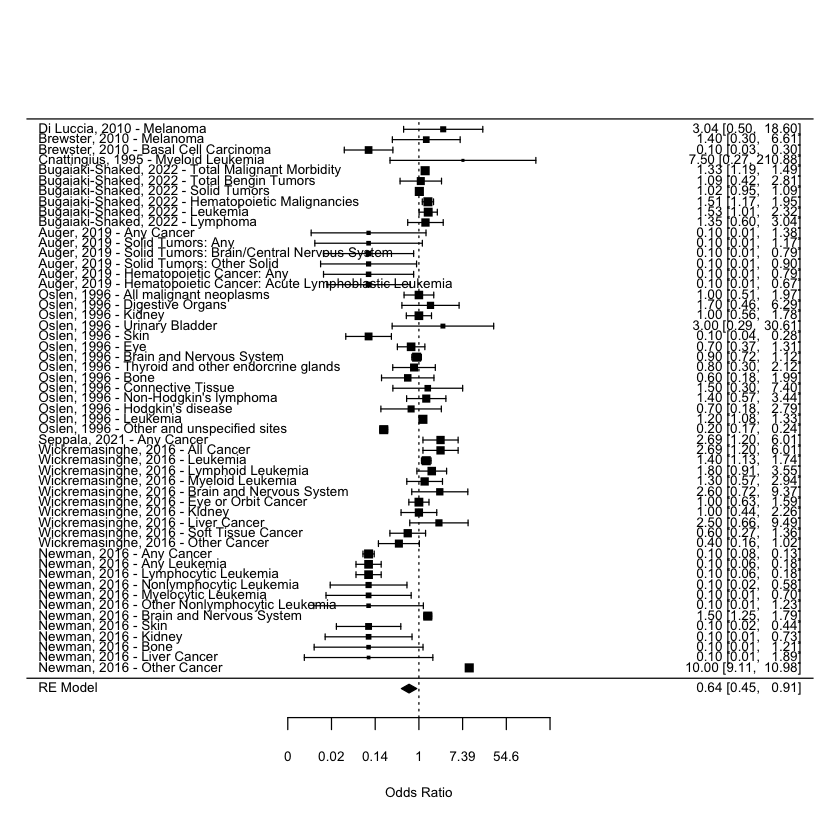

In [29]:
draw_forest_and_other_plots(data)

In [7]:
# Calculate the log odds ratios and their standard errors
log_or <- log(data$odds_ratio)
se_log_or <- (log(data$upper_ci) - log(data$lower_ci)) / (2 * qnorm(0.975))

# Calculate the weights for each study
weights <- 1 / se_log_or^2

# Calculate the pooled log odds ratio and its standard error
pooled_log_or <- sum(weights * log_or) / sum(weights)
pooled_se_log_or <- sqrt(1 / sum(weights))

# Calculate the pooled odds ratio and its confidence interval
pooled_or <- exp(pooled_log_or)
lower_ci <- exp(pooled_log_or - 1.96 * pooled_se_log_or)
upper_ci <- exp(pooled_log_or + 1.96 * pooled_se_log_or)

# Print the results
cat("Pooled odds ratio:", pooled_or, "\n")
cat("95% CI:", lower_ci, "-", upper_ci, "\n")

Pooled odds ratio: 0.5981992 
95% CI: 0.5603906 - 0.6385586 


Cancer Type: Melanoma 
----------------------------------------------------------------
Number of rows: 2 
The overall effect size (odds ratio) is 1.943637 with 95% confidence interval ( 0.5982287 ,  6.31485 )

Random-Effects Model (k = 2; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -1.7283    0.4060    7.4567    4.8429   19.4567   

tau^2 (estimated amount of total heterogeneity): 0 (SE = 1.0470)
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 1) = 0.4060, p-val = 0.5240

Model Results:

estimate      se    zval    pval    ci.lb   ci.ub    
  0.6646  0.6012  1.1054  0.2690  -0.5138  1.8429    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

----------------------------------------------------------------
Cancer Type: Basal Cell Carcinoma 
------------------------------------------------------

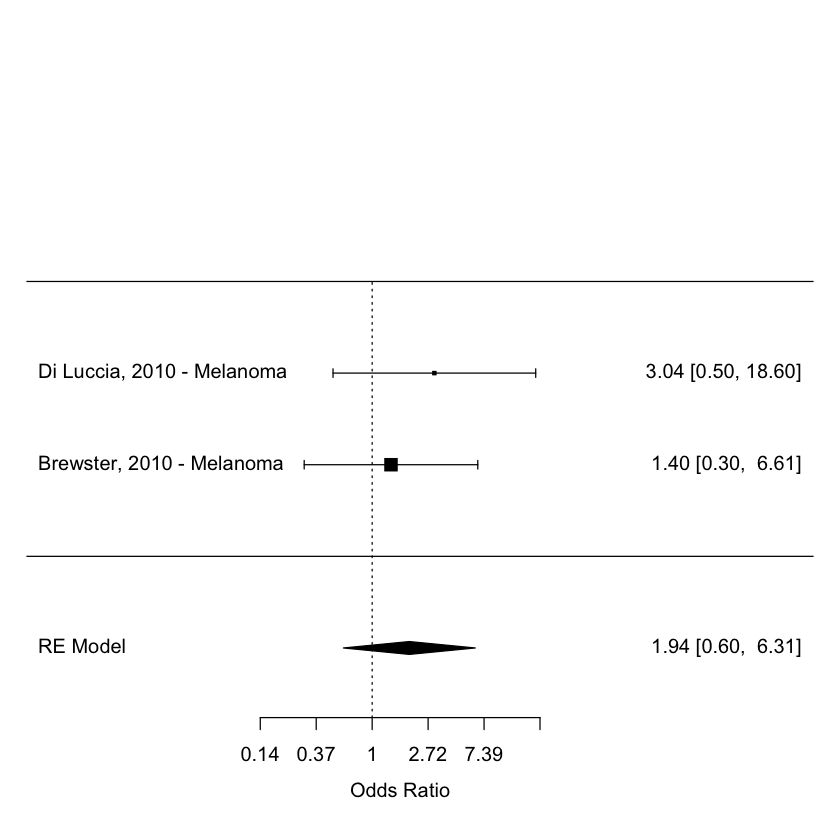

----------------------------------------------------------------
Cancer Type: Myeloid Leukemia 
----------------------------------------------------------------
Number of rows: 2 
The overall effect size (odds ratio) is 1.435338 with 95% confidence interval ( 0.6493723 ,  3.172594 )

Random-Effects Model (k = 2; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -1.9943    1.0008    7.9885    5.3748   19.9885   

tau^2 (estimated amount of total heterogeneity): 0.0001 (SE = 2.1718)
tau (square root of estimated tau^2 value):      0.0114
I^2 (total heterogeneity / total variability):   0.01%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 1) = 1.0001, p-val = 0.3173

Model Results:

estimate      se    zval    pval    ci.lb   ci.ub    
  0.3614  0.4047  0.8931  0.3718  -0.4317  1.1545    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



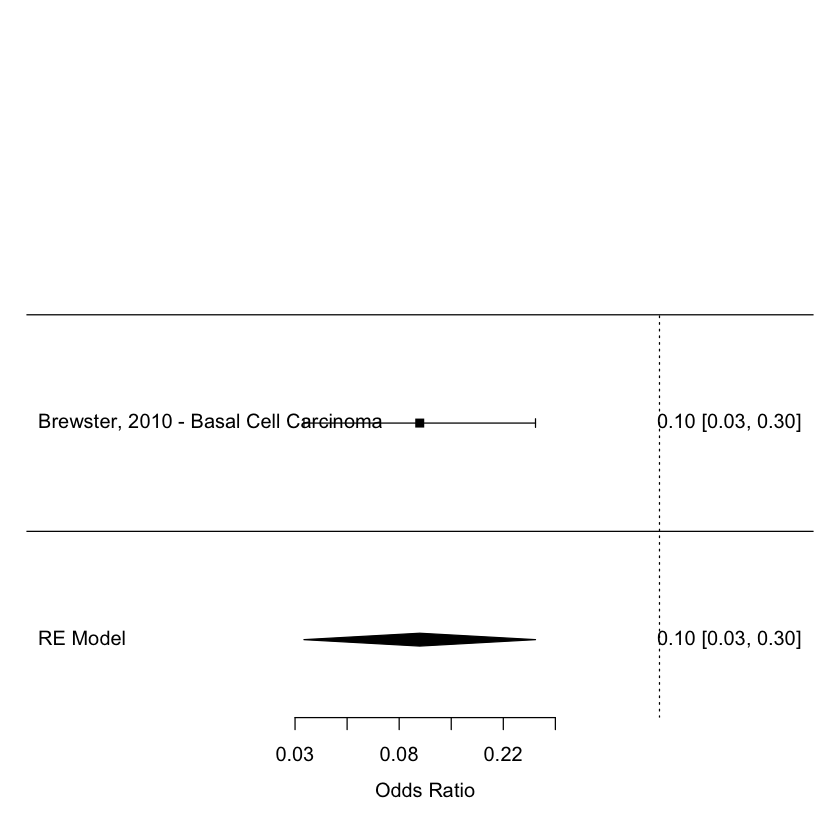

----------------------------------------------------------------
Cancer Type: Total Malignant Morbidity 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 1.33 with 95% confidence interval ( 1.186462 ,  1.490903 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  1.9238    0.0000    0.1524   -3.8476   12.1524   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se    zval    pval   ci.lb   ci.ub      
  0.2852  0.0583  4.8944  <.0001  0.1710  0.3994  *** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



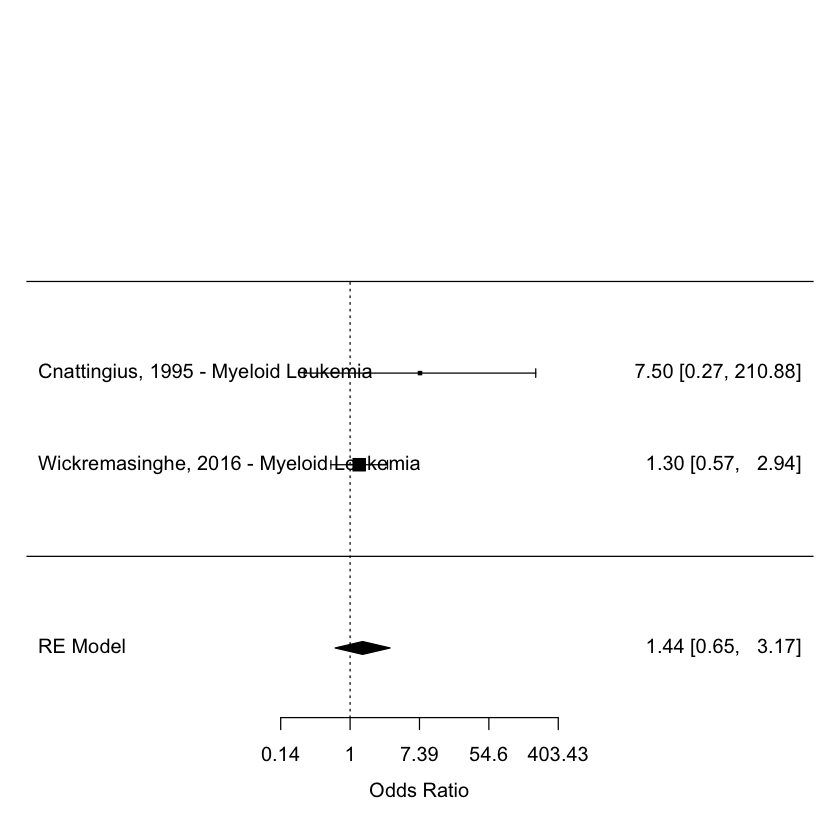

----------------------------------------------------------------
Cancer Type: Total Bengin Tumors 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 1.09 with 95% confidence interval ( 0.4222935 ,  2.813446 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.1928    0.0000    4.3857    0.3857   16.3857   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se    zval    pval    ci.lb   ci.ub    
  0.0862  0.4838  0.1781  0.8586  -0.8620  1.0344    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



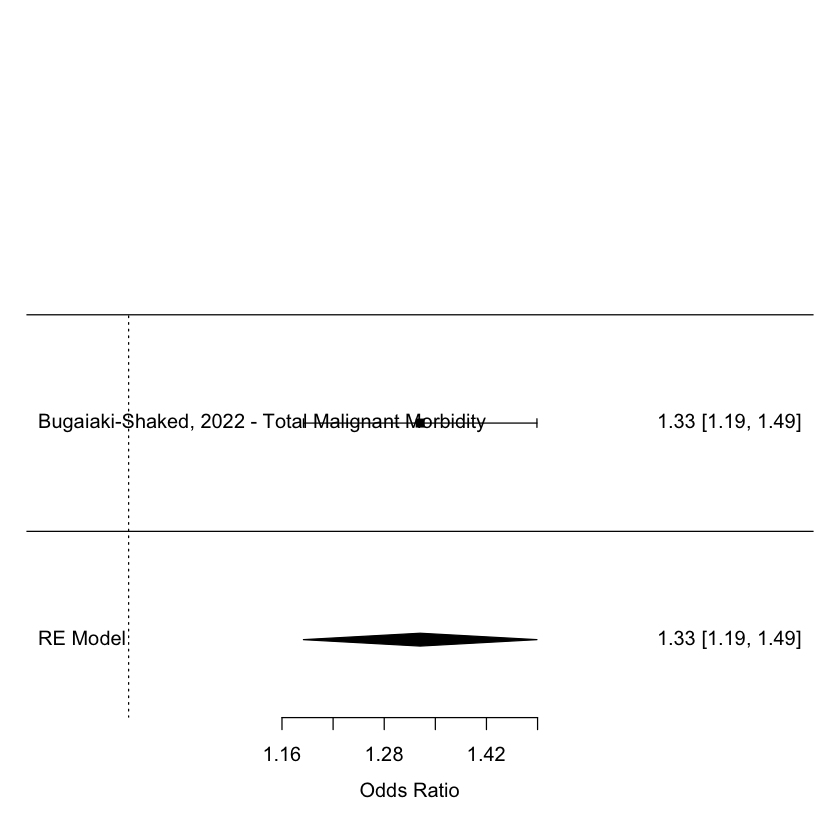

----------------------------------------------------------------
Cancer Type: Solid Tumors 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 1.02 with 95% confidence interval ( 0.9545618 ,  1.089924 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  2.4675    0.0000   -0.9350   -4.9350   11.0650   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se    zval    pval    ci.lb   ci.ub    
  0.0198  0.0338  0.5854  0.5583  -0.0465  0.0861    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



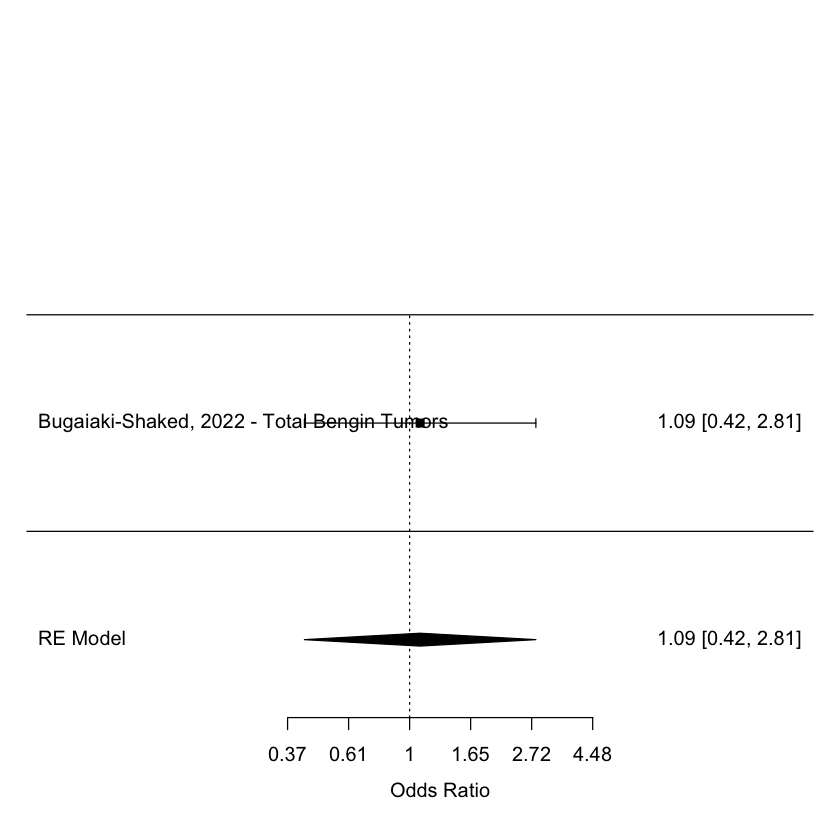

----------------------------------------------------------------
Cancer Type: Hematopoietic Malignancies 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 1.51 with 95% confidence interval ( 1.167649 ,  1.952727 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  1.1122    0.0000    1.7755   -2.2245   13.7755   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se    zval    pval   ci.lb   ci.ub     
  0.4121  0.1312  3.1415  0.0017  0.1550  0.6692  ** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



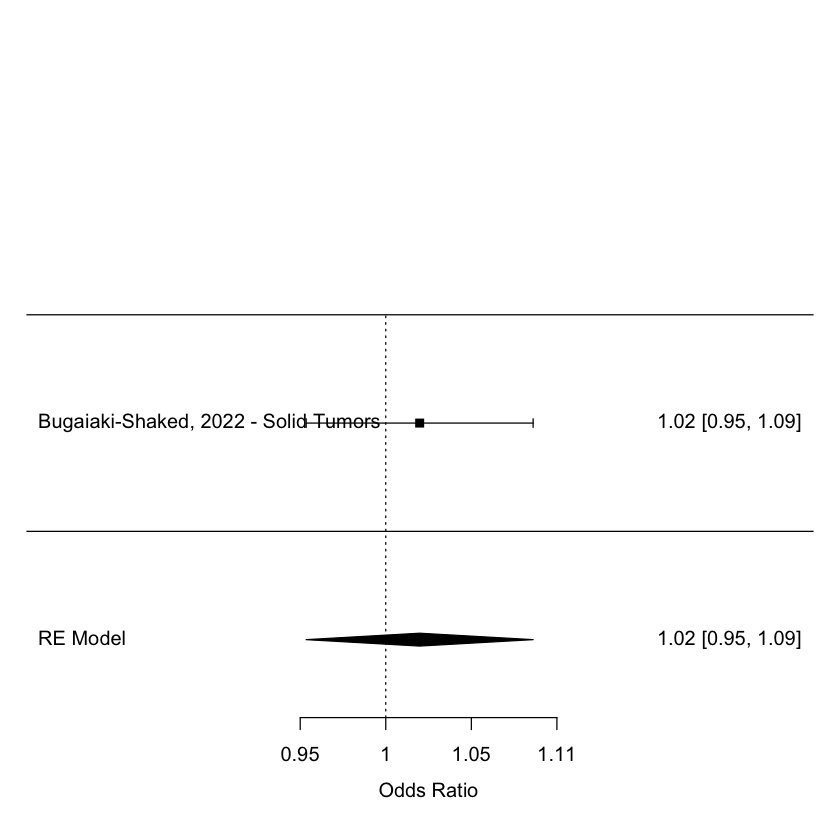

----------------------------------------------------------------
Cancer Type: Leukemia 
----------------------------------------------------------------
Number of rows: 3 
The overall effect size (odds ratio) is 1.272886 with 95% confidence interval ( 1.125129 ,  1.440047 )

Random-Effects Model (k = 3; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  2.4666    2.9228   -0.9331   -2.7359   11.0669   

tau^2 (estimated amount of total heterogeneity): 0.0032 (SE = 0.0153)
tau (square root of estimated tau^2 value):      0.0565
I^2 (total heterogeneity / total variability):   21.04%
H^2 (total variability / sampling variability):  1.27

Test for Heterogeneity:
Q(df = 2) = 2.5330, p-val = 0.2818

Model Results:

estimate      se    zval    pval   ci.lb   ci.ub      
  0.2413  0.0630  3.8328  0.0001  0.1179  0.3647  *** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



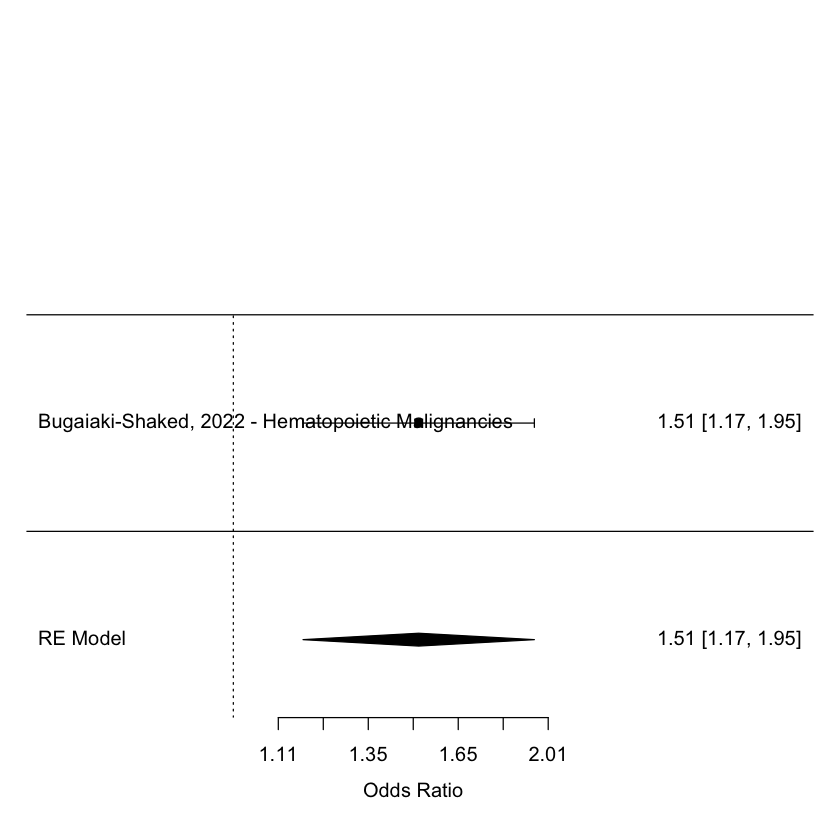

----------------------------------------------------------------
Cancer Type: Lymphoma 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 1.35 with 95% confidence interval ( 0.59937 ,  3.040693 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.0377    0.0000    4.0754    0.0754   16.0754   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se    zval    pval    ci.lb   ci.ub    
  0.3001  0.4143  0.7244  0.4688  -0.5119  1.1121    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



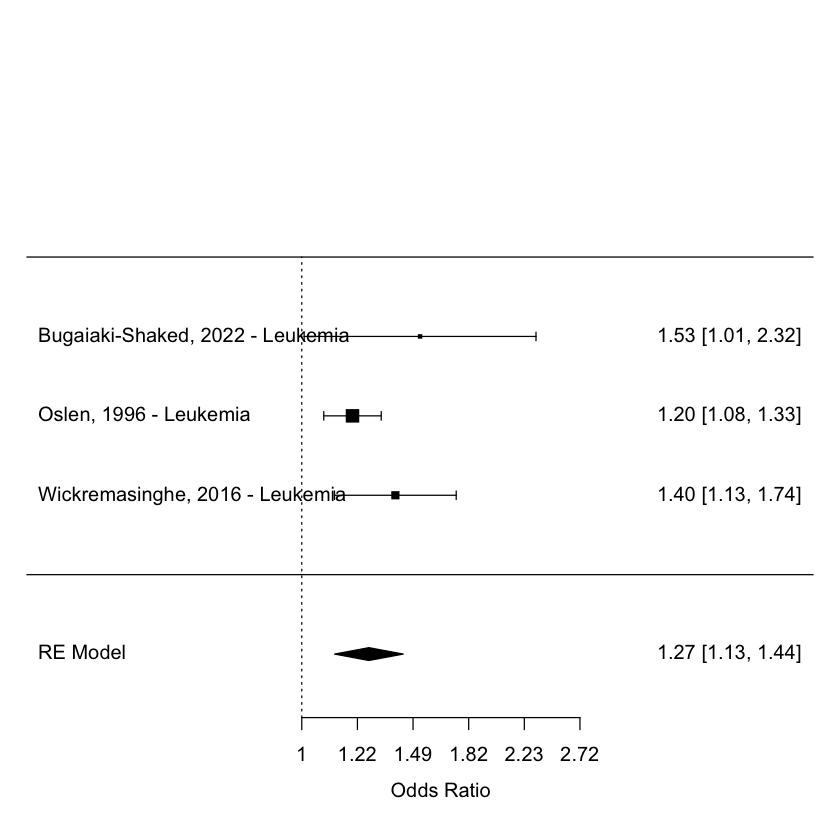

----------------------------------------------------------------
Cancer Type: Any Cancer 
----------------------------------------------------------------
Number of rows: 3 
The overall effect size (odds ratio) is 0.3262288 with 95% confidence interval ( 0.02386185 ,  4.460057 )

Random-Effects Model (k = 3; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -5.9851   11.7137   15.9703   14.1675   27.9703   

tau^2 (estimated amount of total heterogeneity): 4.7887 (SE = 6.4519)
tau (square root of estimated tau^2 value):      2.1883
I^2 (total heterogeneity / total variability):   96.58%
H^2 (total variability / sampling variability):  29.21

Test for Heterogeneity:
Q(df = 2) = 58.4113, p-val < .0001

Model Results:

estimate      se     zval    pval    ci.lb   ci.ub    
 -1.1202  1.3343  -0.8395  0.4012  -3.7354  1.4951    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



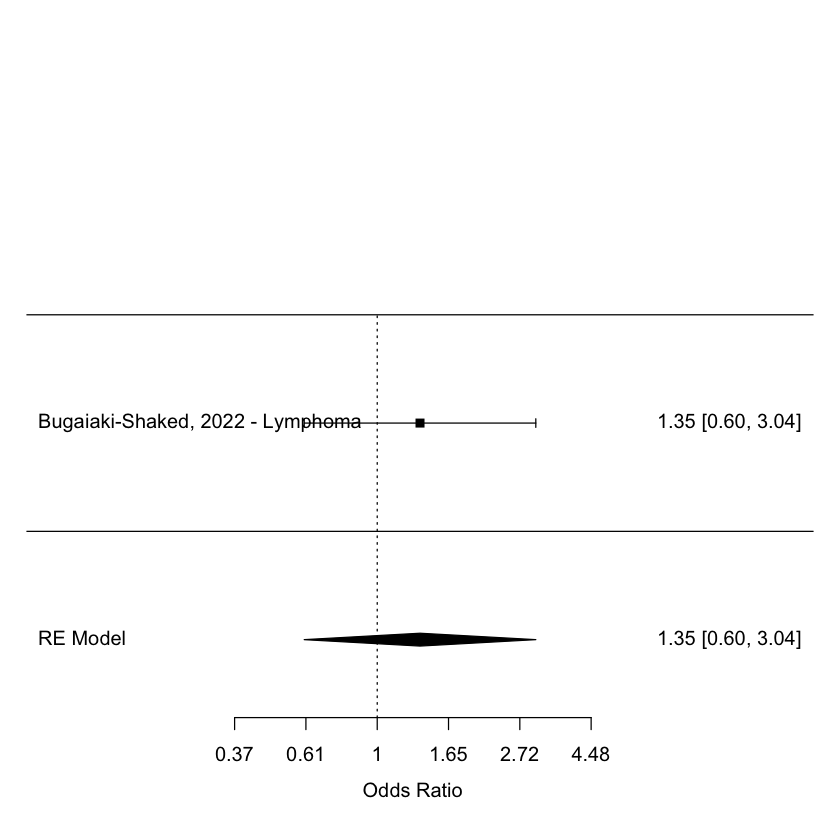

----------------------------------------------------------------
Cancer Type: Solid Tumors: Any 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.1 with 95% confidence interval ( 0.008548561 ,  1.169788 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -1.1459    0.0000    6.2918    2.2918   18.2918   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb   ci.ub    
 -2.3026  1.2548  -1.8350  0.0665  -4.7619  0.1568  . 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



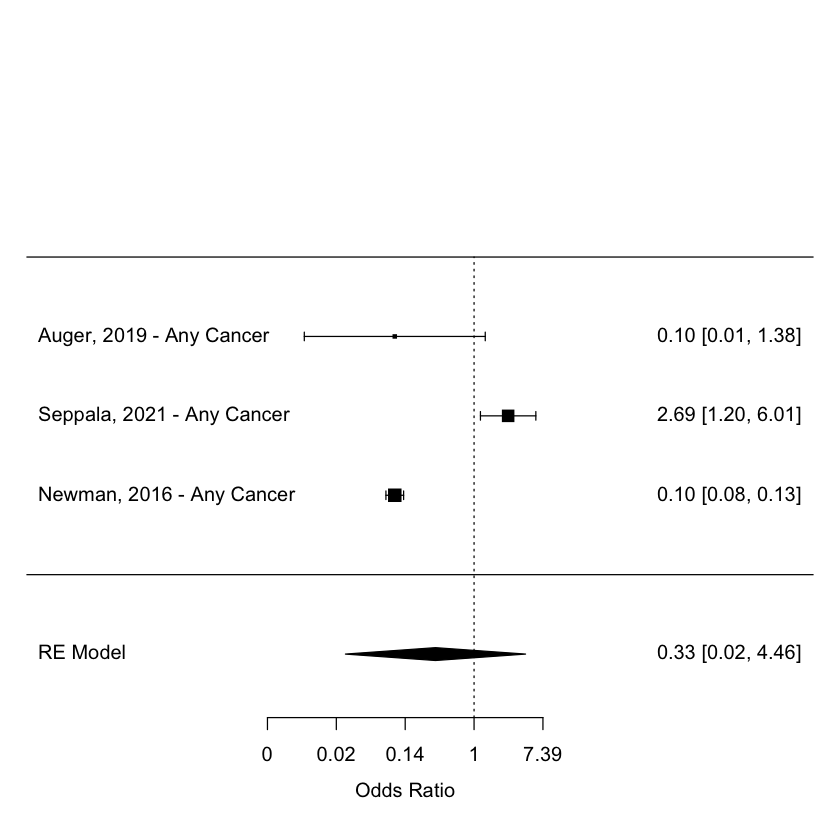

----------------------------------------------------------------
Cancer Type: Solid Tumors: Brain/Central Nervous System 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.1 with 95% confidence interval ( 0.01271928 ,  0.7862082 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.9697    0.0000    5.9394    1.9394   17.9394   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb    ci.ub    
 -2.3026  1.0521  -2.1886  0.0286  -4.3646  -0.2406  * 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



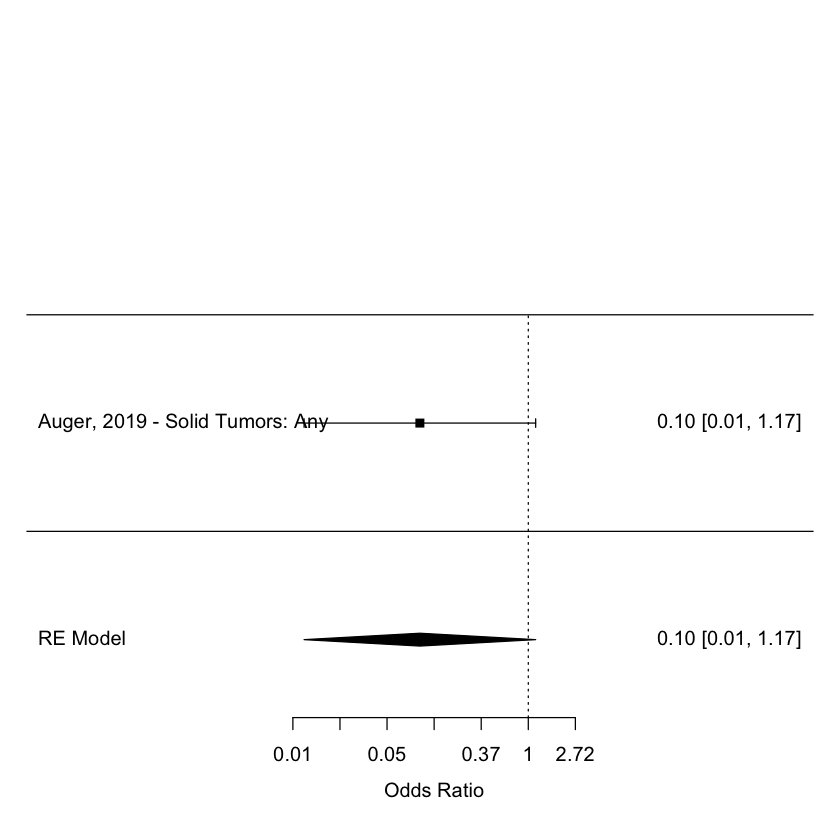

----------------------------------------------------------------
Cancer Type: Solid Tumors: Other Solid 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.1 with 95% confidence interval ( 0.01112589 ,  0.8988046 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -1.0326    0.0000    6.0652    2.0652   18.0652   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb    ci.ub    
 -2.3026  1.1204  -2.0552  0.0399  -4.4984  -0.1067  * 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



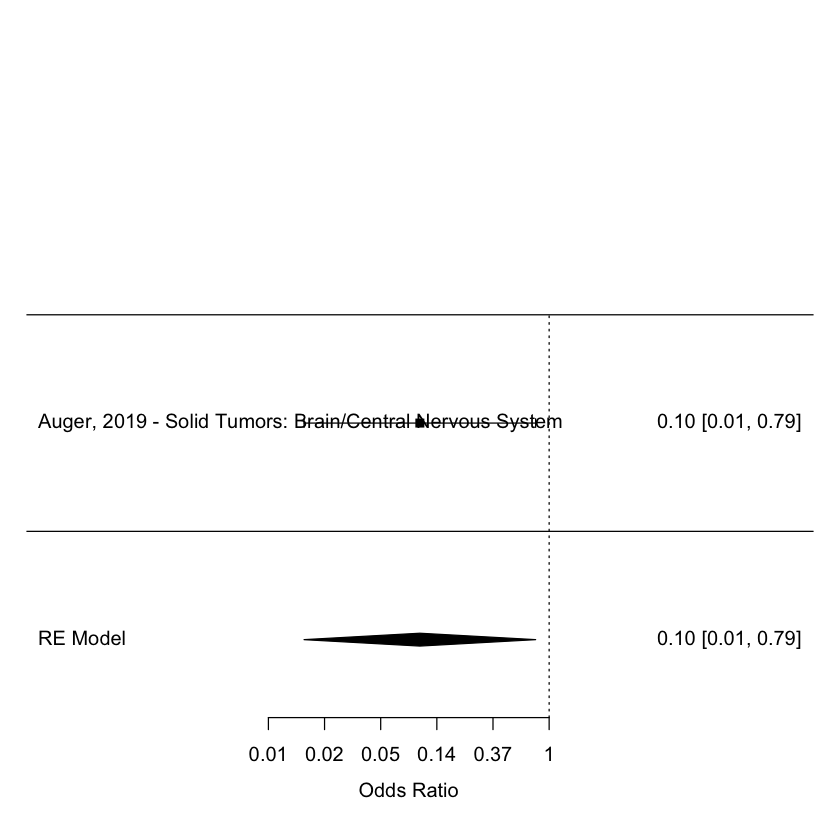

----------------------------------------------------------------
Cancer Type: Hematopoietic Cancer: Any 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.1 with 95% confidence interval ( 0.01271928 ,  0.7862082 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.9697    0.0000    5.9394    1.9394   17.9394   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb    ci.ub    
 -2.3026  1.0521  -2.1886  0.0286  -4.3646  -0.2406  * 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



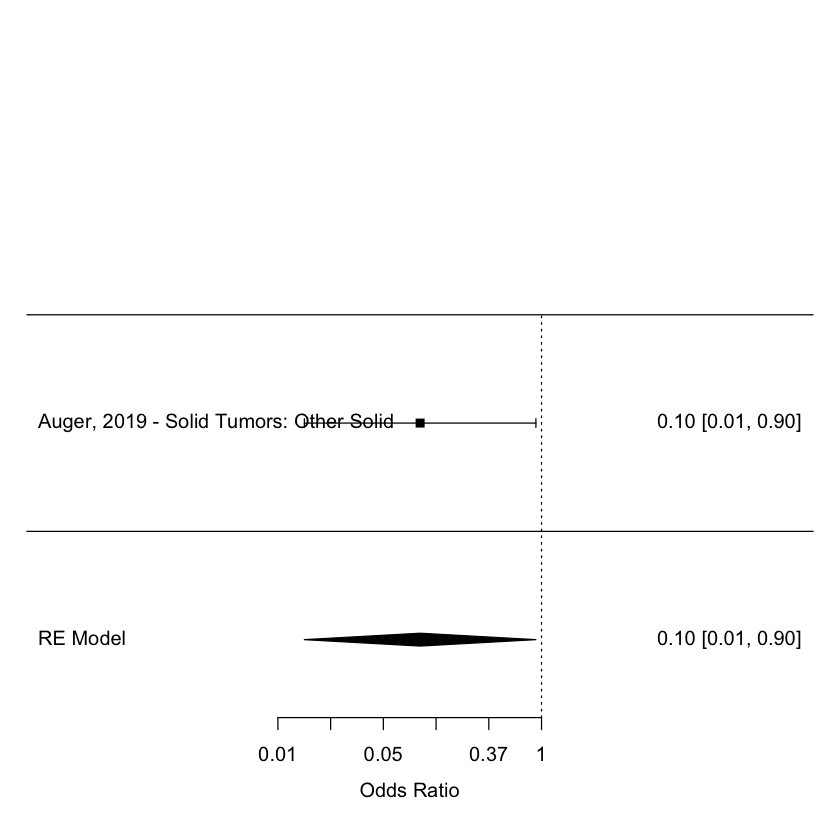

----------------------------------------------------------------
Cancer Type: Hematopoietic Cancer: Acute Lymphoblastic Leukemia 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.1 with 95% confidence interval ( 0.01485265 ,  0.6732806 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.8915    0.0000    5.7830    1.7830   17.7830   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb    ci.ub    
 -2.3026  0.9730  -2.3666  0.0180  -4.2095  -0.3956  * 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



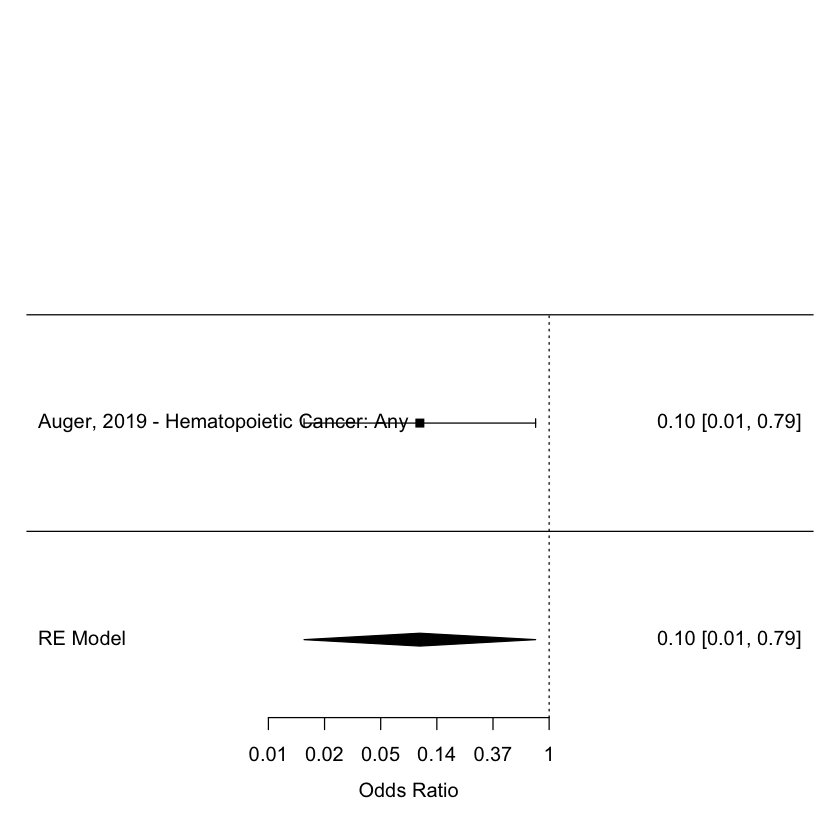

----------------------------------------------------------------
Cancer Type: All malignant neoplasms 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 1 with 95% confidence interval ( 0.5069797 ,  1.972465 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  0.1407    0.0000    3.7186   -0.2814   15.7186   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se    zval    pval    ci.lb   ci.ub    
  0.0000  0.3466  0.0000  1.0000  -0.6793  0.6793    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



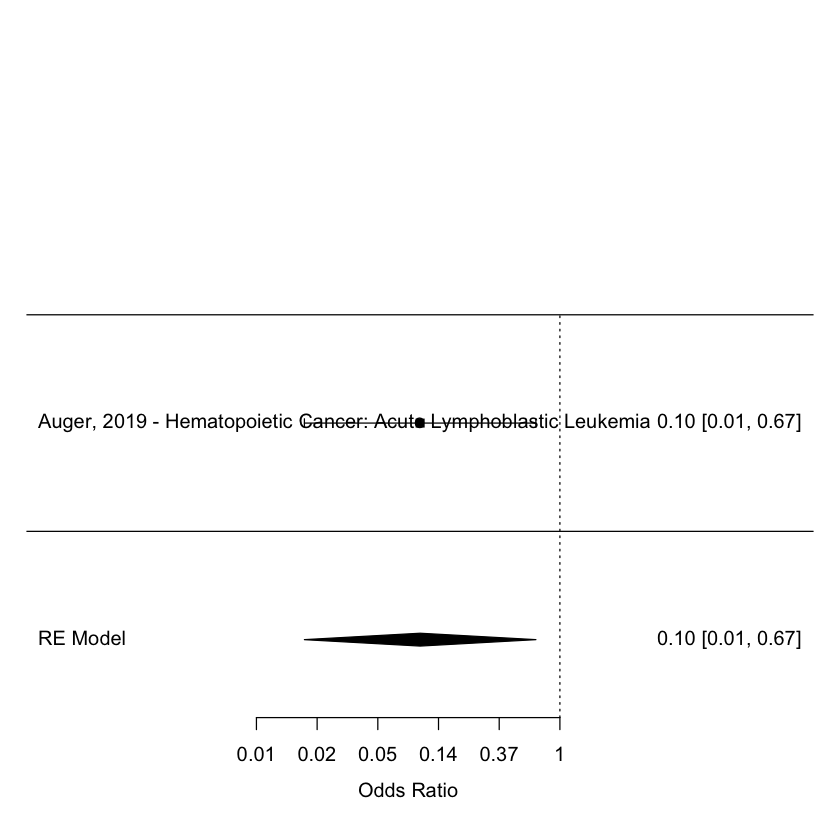

----------------------------------------------------------------
Cancer Type: Digestive Organs 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 1.7 with 95% confidence interval ( 0.4594741 ,  6.2898 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.5147    0.0000    5.0294    1.0294   17.0294   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se    zval    pval    ci.lb   ci.ub    
  0.5306  0.6675  0.7949  0.4266  -0.7776  1.8389    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



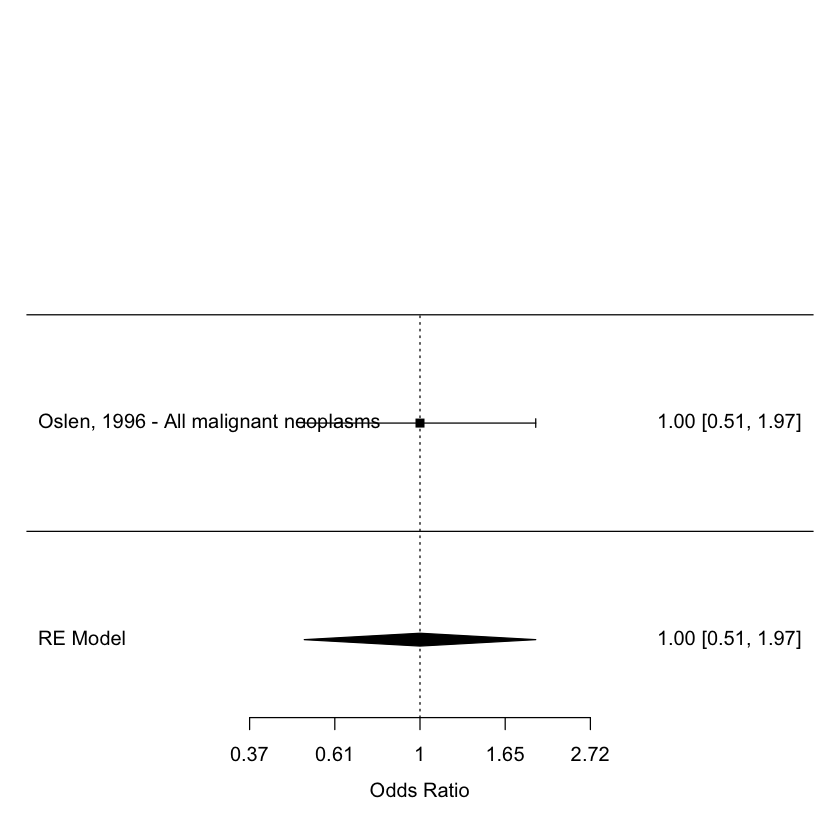

----------------------------------------------------------------
Cancer Type: Kidney 
----------------------------------------------------------------
Number of rows: 3 
The overall effect size (odds ratio) is 0.7227374 with 95% confidence interval ( 0.307897 ,  1.696507 )

Random-Effects Model (k = 3; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -3.7857    6.2308   11.5713    9.7686   23.5713   

tau^2 (estimated amount of total heterogeneity): 0.3156 (SE = 0.5785)
tau (square root of estimated tau^2 value):      0.5618
I^2 (total heterogeneity / total variability):   59.03%
H^2 (total variability / sampling variability):  2.44

Test for Heterogeneity:
Q(df = 2) = 4.8820, p-val = 0.0871

Model Results:

estimate      se     zval    pval    ci.lb   ci.ub    
 -0.3247  0.4353  -0.7459  0.4558  -1.1780  0.5286    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



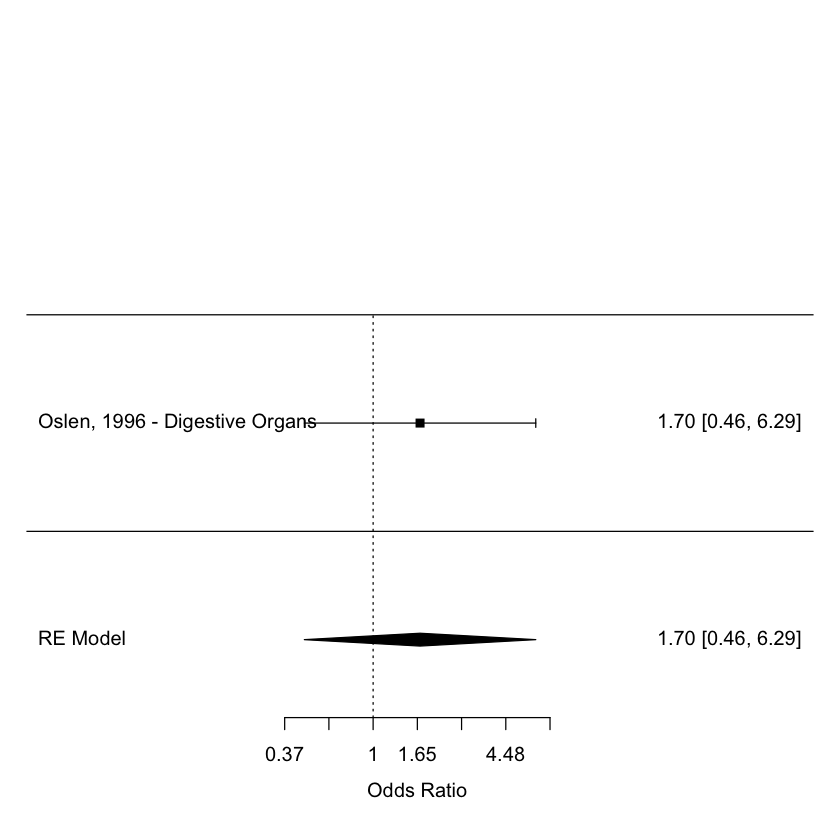

----------------------------------------------------------------
Cancer Type: Urinary Bladder 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 3 with 95% confidence interval ( 0.293985 ,  30.61381 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -1.0888    0.0000    6.1776    2.1776   18.1776   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se    zval    pval    ci.lb   ci.ub    
  1.0986  1.1851  0.9270  0.3539  -1.2242  3.4214    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



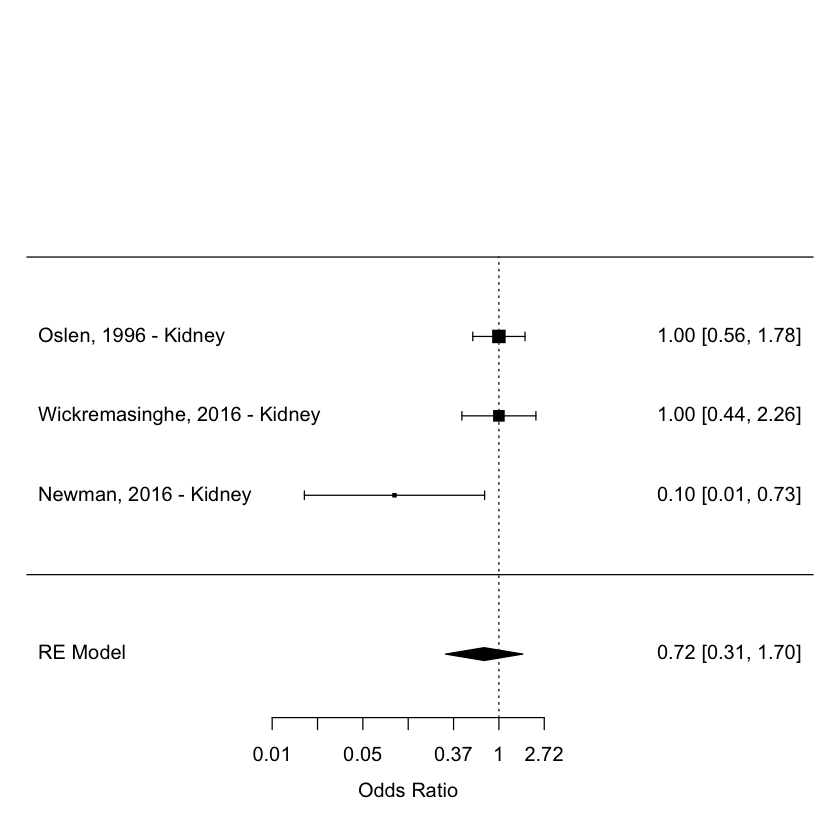

----------------------------------------------------------------
Cancer Type: Skin 
----------------------------------------------------------------
Number of rows: 2 
The overall effect size (odds ratio) is 0.1 with 95% confidence interval ( 0.0426717 ,  0.2343474 )

Random-Effects Model (k = 2; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.9225   -0.0000    5.8449    3.2312   17.8449   

tau^2 (estimated amount of total heterogeneity): 0 (SE = 0.6003)
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 1) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb    ci.ub      
 -2.3026  0.4345  -5.2993  <.0001  -3.1542  -1.4510  *** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



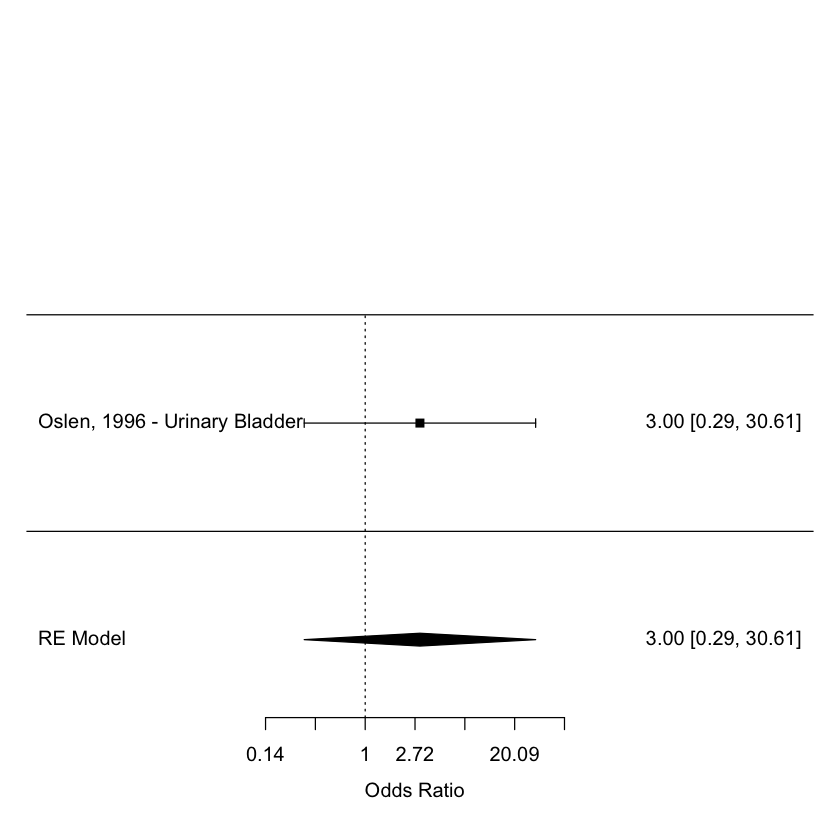

----------------------------------------------------------------
Cancer Type: Eye 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.7 with 95% confidence interval ( 0.373181 ,  1.313036 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  0.2176    0.0000    3.5648   -0.4352   15.5648   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb   ci.ub    
 -0.3567  0.3209  -1.1114  0.2664  -0.9857  0.2723    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



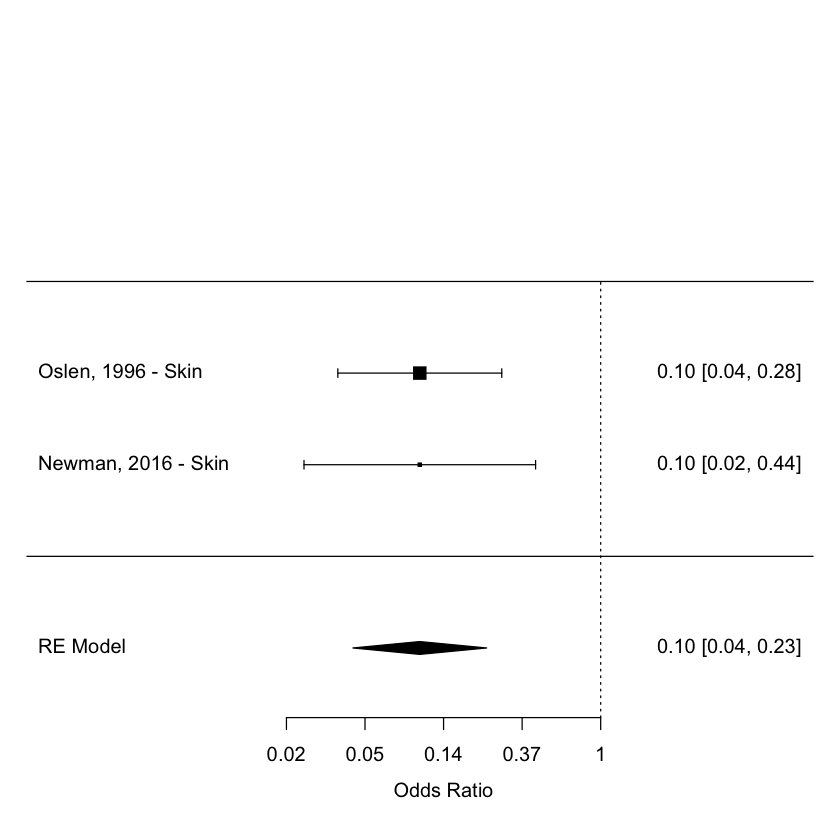

----------------------------------------------------------------
Cancer Type: Brain and Nervous System 
----------------------------------------------------------------
Number of rows: 3 
The overall effect size (odds ratio) is 1.269835 with 95% confidence interval ( 0.7925404 ,  2.034574 )

Random-Effects Model (k = 3; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -1.4393    7.3902    6.8786    5.0758   18.8786   

tau^2 (estimated amount of total heterogeneity): 0.1190 (SE = 0.1778)
tau (square root of estimated tau^2 value):      0.3450
I^2 (total heterogeneity / total variability):   85.60%
H^2 (total variability / sampling variability):  6.94

Test for Heterogeneity:
Q(df = 2) = 13.8855, p-val = 0.0010

Model Results:

estimate      se    zval    pval    ci.lb   ci.ub    
  0.2389  0.2405  0.9933  0.3206  -0.2325  0.7103    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



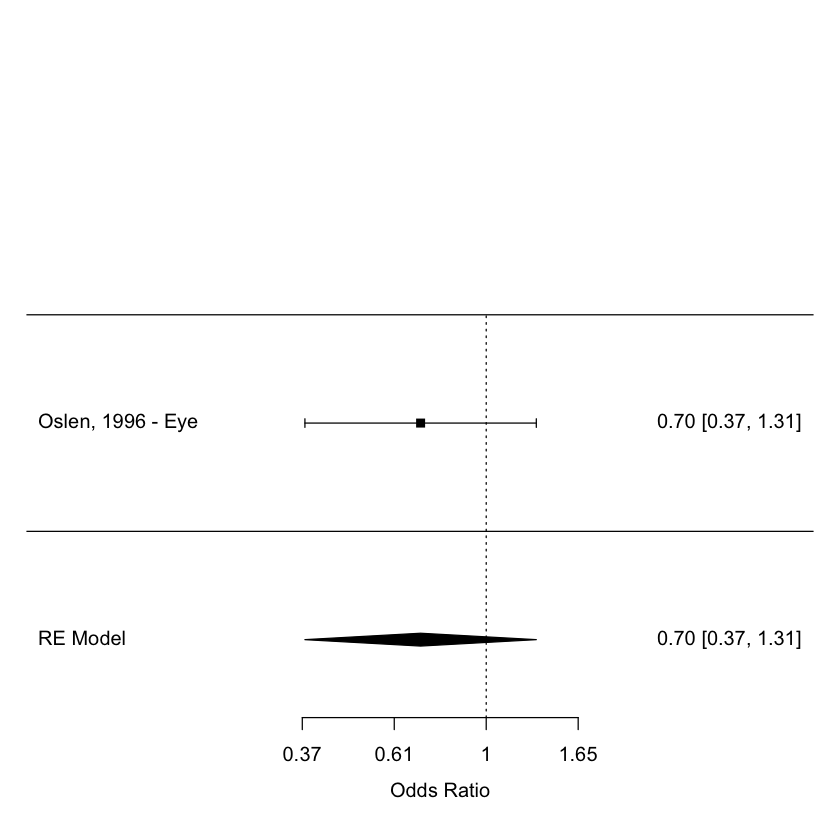

----------------------------------------------------------------
Cancer Type: Thyroid and other endorcrine glands 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.8 with 95% confidence interval ( 0.3022411 ,  2.117515 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.2190    0.0000    4.4380    0.4380   16.4380   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb   ci.ub    
 -0.2231  0.4966  -0.4493  0.6532  -1.1965  0.7502    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



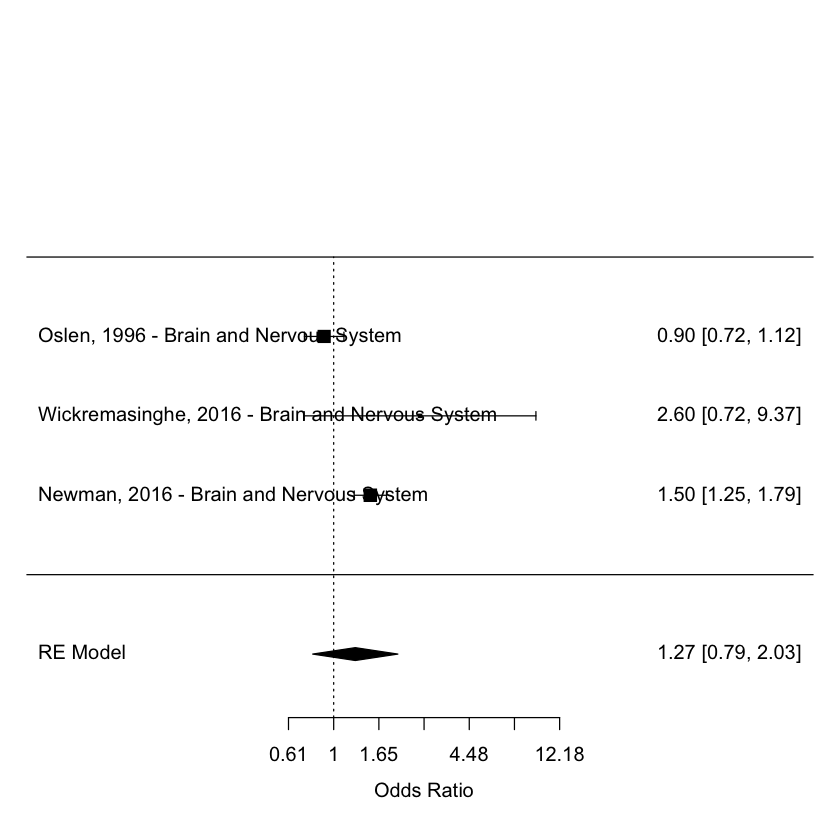

----------------------------------------------------------------
Cancer Type: Bone 
----------------------------------------------------------------
Number of rows: 2 
The overall effect size (odds ratio) is 0.3462725 with 95% confidence interval ( 0.0685586 ,  1.748937 )

Random-Effects Model (k = 2; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -2.7303    2.2879    9.4605    6.8468   21.4605   

tau^2 (estimated amount of total heterogeneity): 0.6105 (SE = 2.2701)
tau (square root of estimated tau^2 value):      0.7814
I^2 (total heterogeneity / total variability):   38.03%
H^2 (total variability / sampling variability):  1.61

Test for Heterogeneity:
Q(df = 1) = 1.6138, p-val = 0.2040

Model Results:

estimate      se     zval    pval    ci.lb   ci.ub    
 -1.0605  0.8263  -1.2835  0.1993  -2.6800  0.5590    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



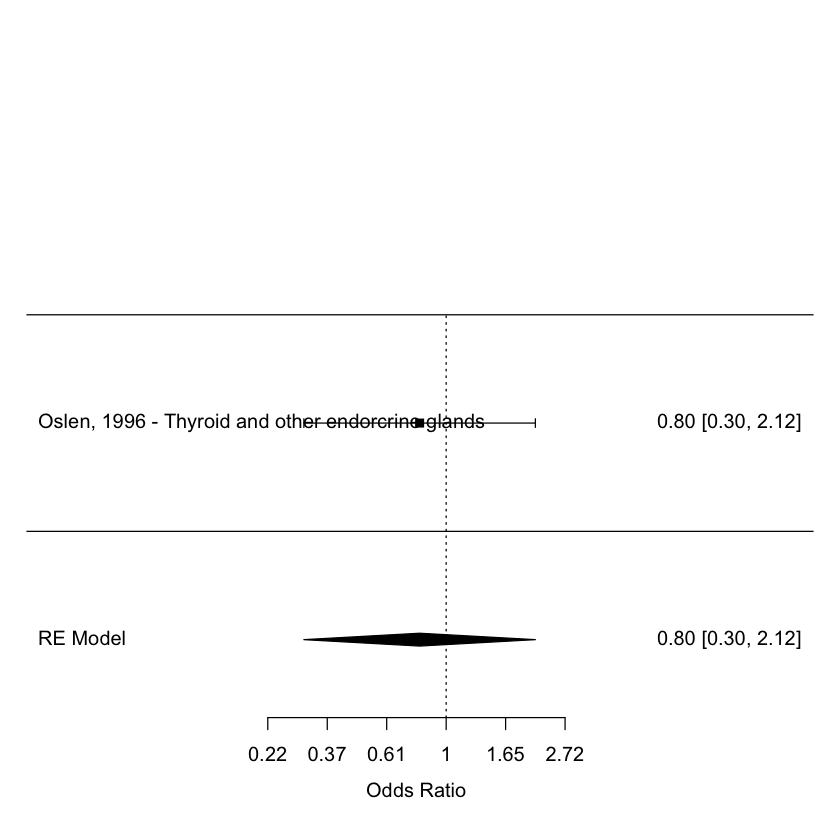

----------------------------------------------------------------
Cancer Type: Connective Tissue 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 1.5 with 95% confidence interval ( 0.3038593 ,  7.404744 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.7139    0.0000    5.4278    1.4278   17.4278   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se    zval    pval    ci.lb   ci.ub    
  0.4055  0.8146  0.4977  0.6187  -1.1912  2.0021    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



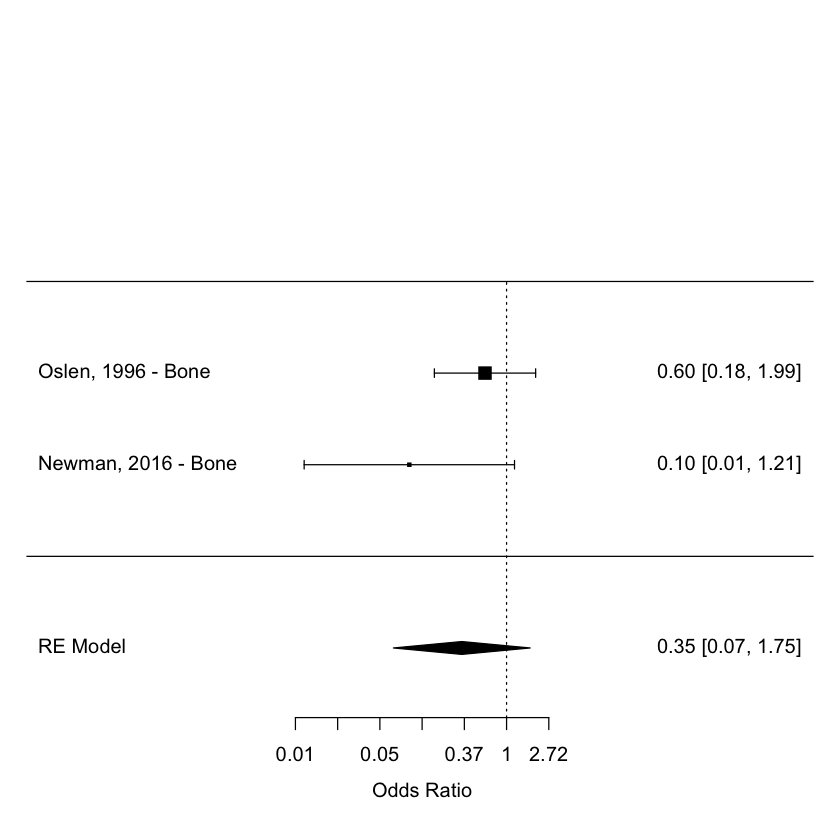

----------------------------------------------------------------
Cancer Type: Non-Hodgkin's lymphoma 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 1.4 with 95% confidence interval ( 0.5703571 ,  3.436444 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.1384    0.0000    4.2767    0.2767   16.2767   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se    zval    pval    ci.lb   ci.ub    
  0.3365  0.4581  0.7344  0.4627  -0.5615  1.2344    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



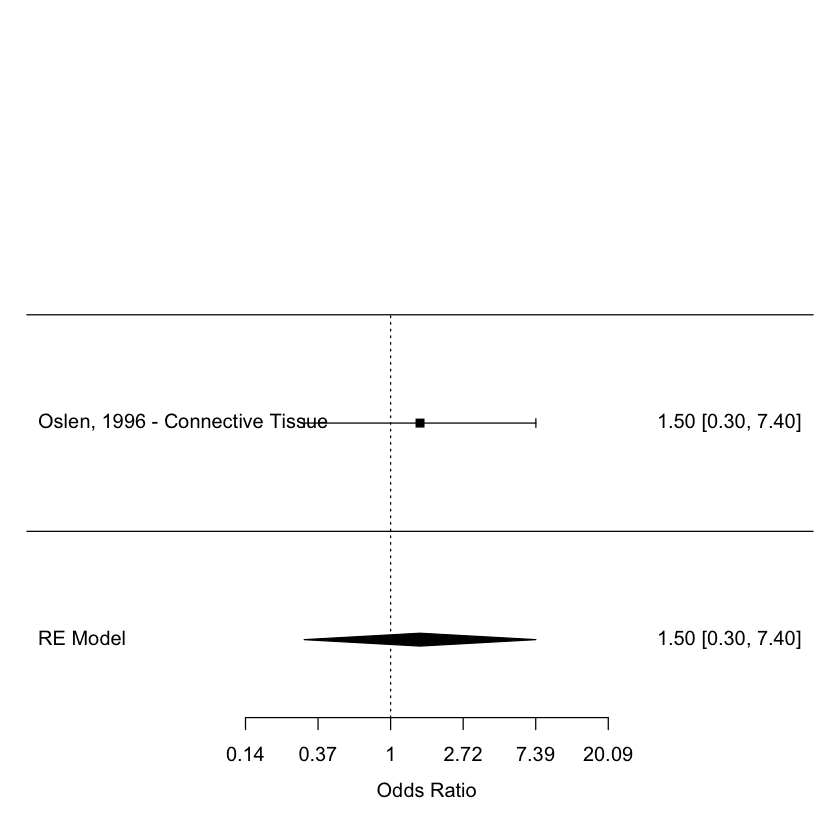

----------------------------------------------------------------
Cancer Type: Hodgkin's disease 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.7 with 95% confidence interval ( 0.1756183 ,  2.790141 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.5701    0.0000    5.1402    1.1402   17.1402   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb   ci.ub    
 -0.3567  0.7055  -0.5056  0.6132  -1.7394  1.0261    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



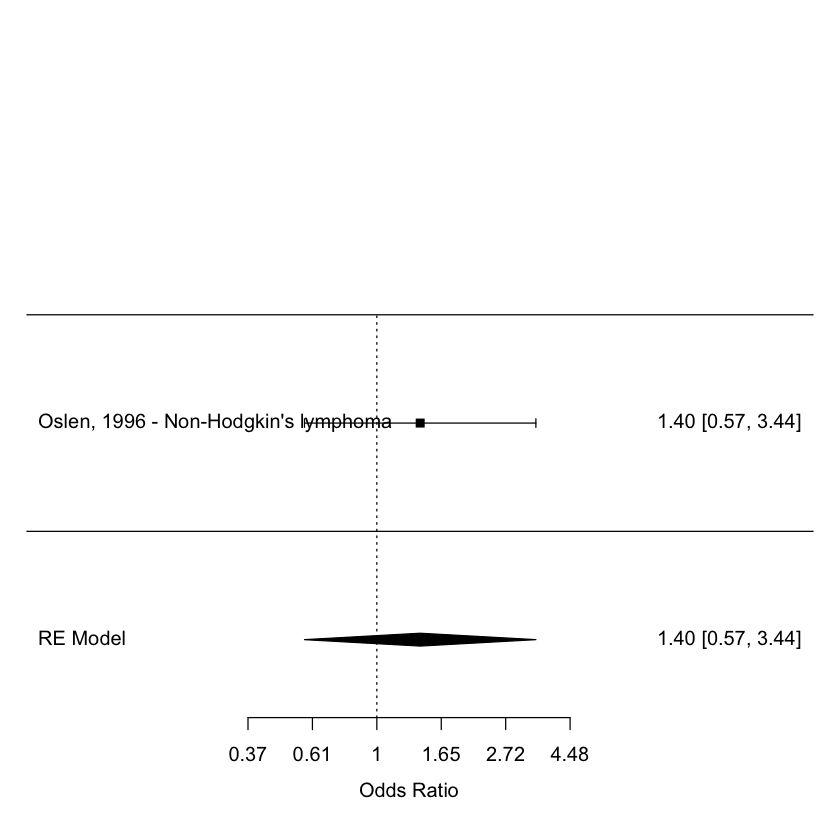

----------------------------------------------------------------
Cancer Type: Other and unspecified sites 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.2 with 95% confidence interval ( 0.1672755 ,  0.2391265 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  1.4762    0.0000    1.0476   -2.9524   13.0476   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se      zval    pval    ci.lb    ci.ub      
 -1.6094  0.0912  -17.6549  <.0001  -1.7881  -1.4308  *** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



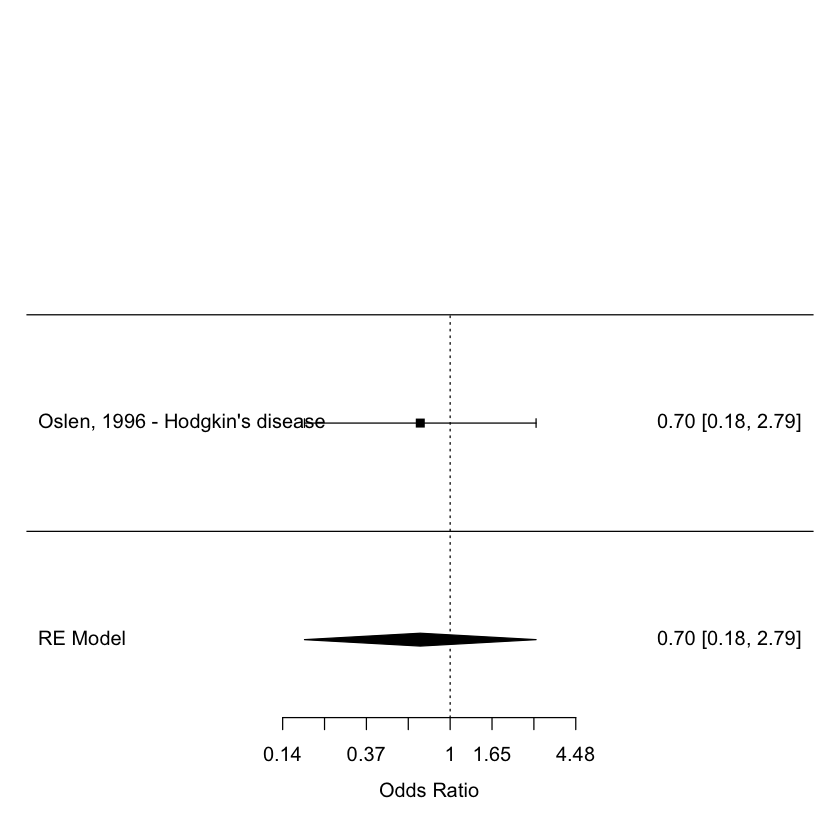

----------------------------------------------------------------
Cancer Type: All Cancer 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 2.69 with 95% confidence interval ( 1.203195 ,  6.014072 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.0285    0.0000    4.0571    0.0571   16.0571   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se    zval    pval   ci.lb   ci.ub    
  0.9895  0.4105  2.4106  0.0159  0.1850  1.7941  * 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



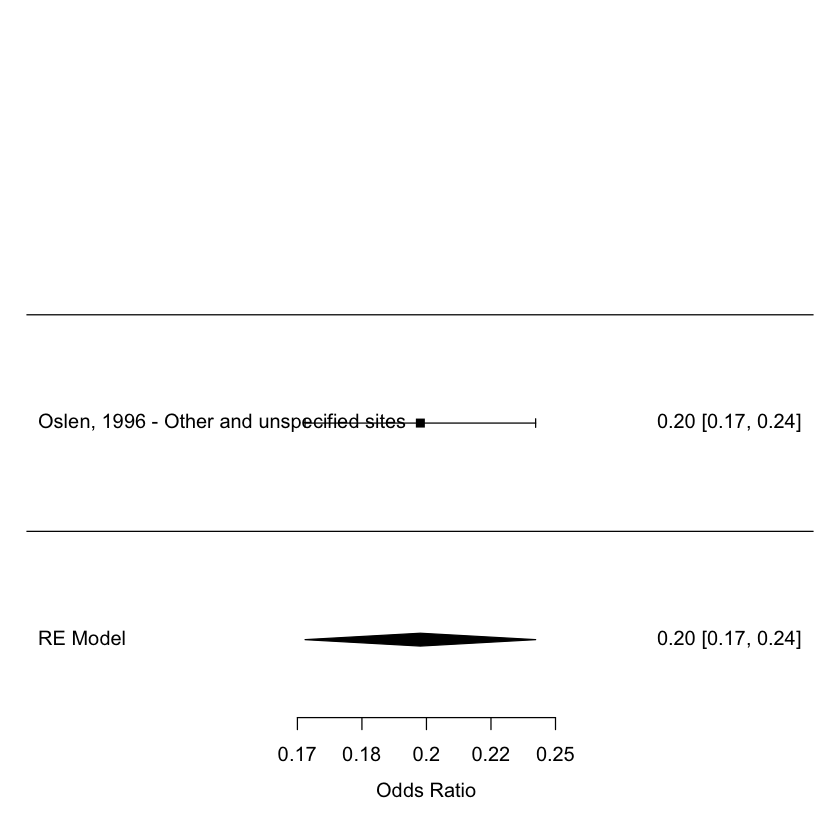

----------------------------------------------------------------
Cancer Type: Lymphoid Leukemia 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 1.8 with 95% confidence interval ( 0.9125635 ,  3.550438 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  0.1407    0.0000    3.7186   -0.2814   15.7186   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se    zval    pval    ci.lb   ci.ub    
  0.5878  0.3466  1.6960  0.0899  -0.0915  1.2671  . 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



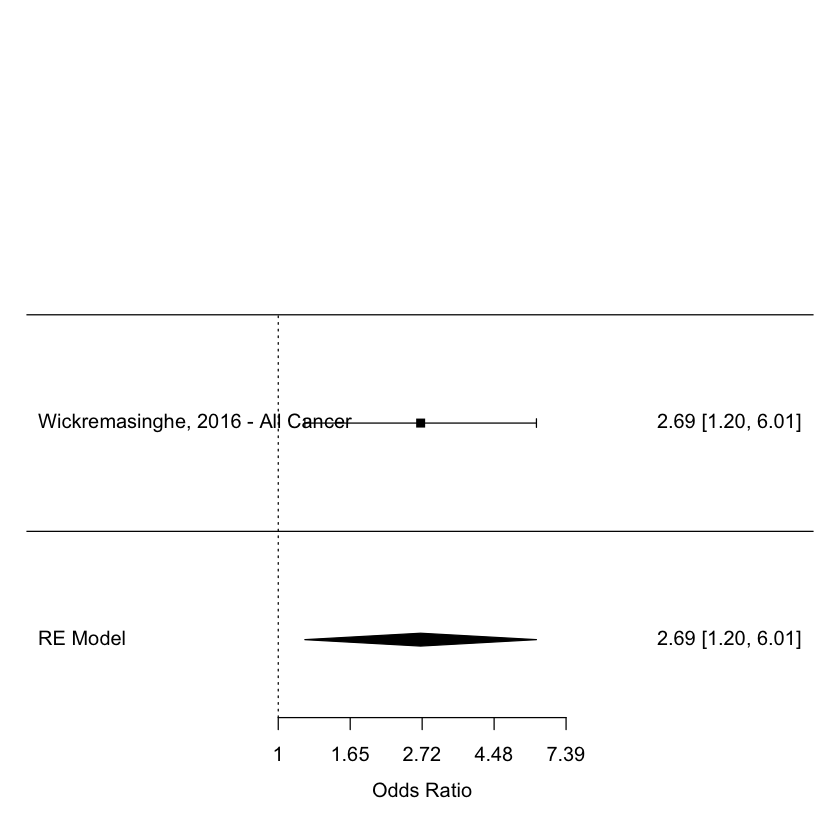

----------------------------------------------------------------
Cancer Type: Eye or Orbit Cancer 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 1 with 95% confidence interval ( 0.6309027 ,  1.58503 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  0.5292    0.0000    2.9416   -1.0584   14.9416   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se    zval    pval    ci.lb   ci.ub    
  0.0000  0.2350  0.0000  1.0000  -0.4606  0.4606    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



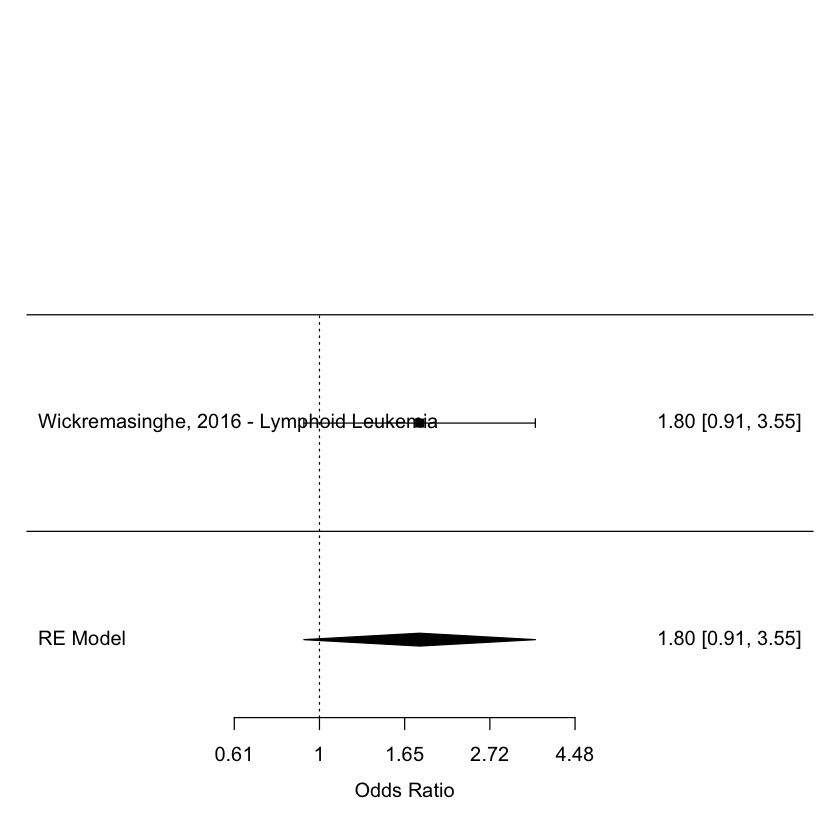

----------------------------------------------------------------
Cancer Type: Liver Cancer 
----------------------------------------------------------------
Number of rows: 2 
The overall effect size (odds ratio) is 0.6600709 with 95% confidence interval ( 0.02952314 ,  14.7577 )

Random-Effects Model (k = 2; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -3.9677    4.2181   11.9354    9.3217   23.9354   

tau^2 (estimated amount of total heterogeneity): 3.8235 (SE = 7.3264)
tau (square root of estimated tau^2 value):      1.9554
I^2 (total heterogeneity / total variability):   73.80%
H^2 (total variability / sampling variability):  3.82

Test for Heterogeneity:
Q(df = 1) = 3.8175, p-val = 0.0507

Model Results:

estimate      se     zval    pval    ci.lb   ci.ub    
 -0.4154  1.5853  -0.2620  0.7933  -3.5225  2.6917    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



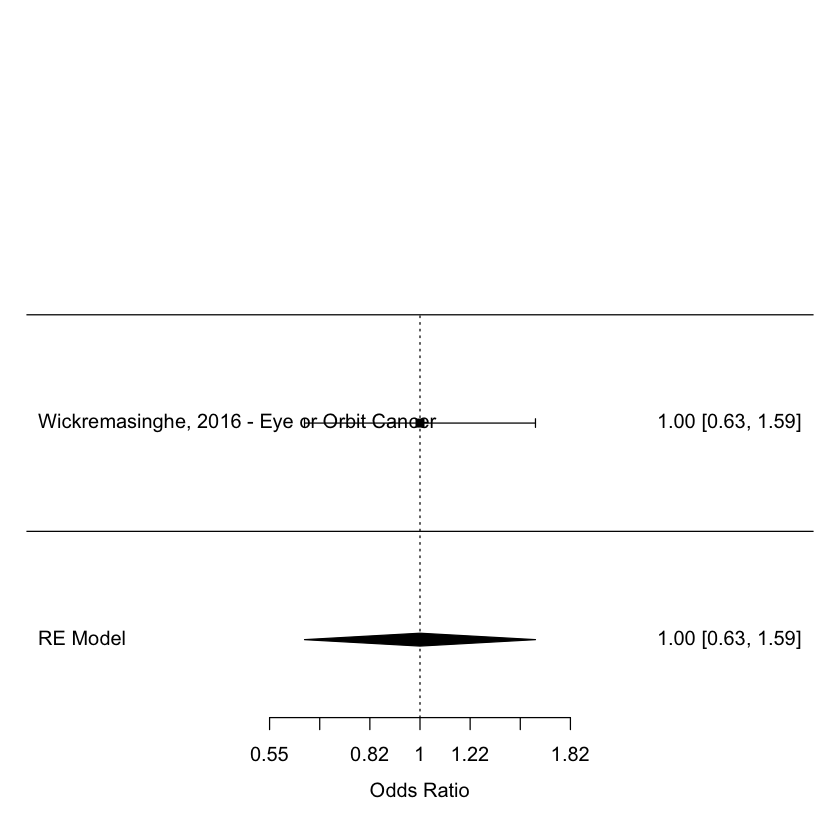

----------------------------------------------------------------
Cancer Type: Soft Tissue Cancer 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.6 with 95% confidence interval ( 0.2652516 ,  1.357202 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.0430    0.0000    4.0859    0.0859   16.0859   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb   ci.ub    
 -0.5108  0.4165  -1.2266  0.2200  -1.3271  0.3054    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



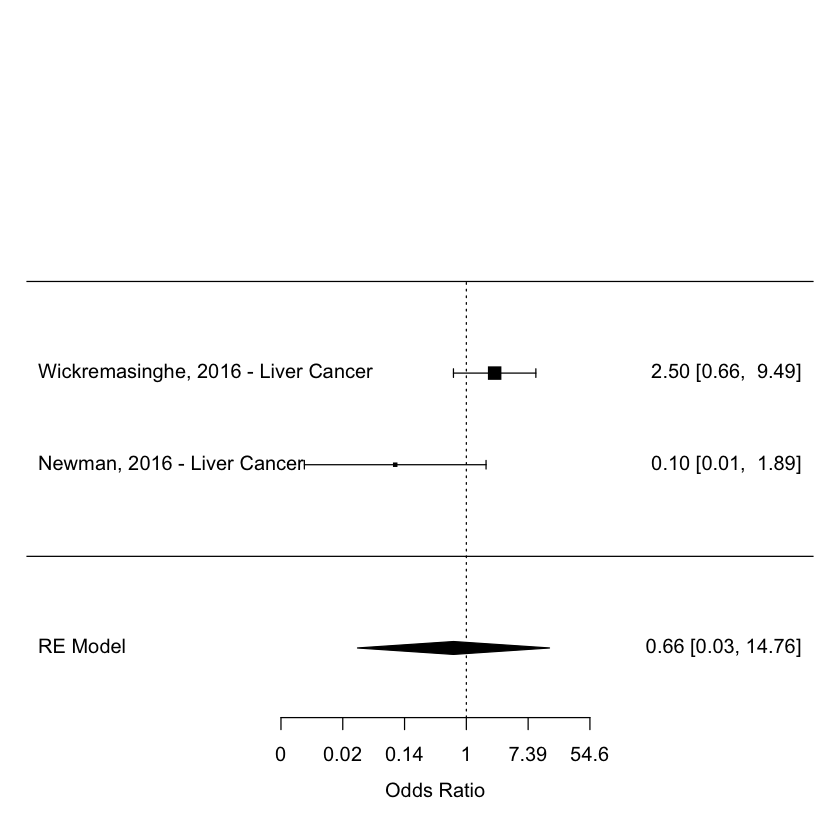

----------------------------------------------------------------
Cancer Type: Other Cancer 
----------------------------------------------------------------
Number of rows: 2 
The overall effect size (odds ratio) is 2.071451 with 95% confidence interval ( 0.08843402 ,  48.52103 )

Random-Effects Model (k = 2; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -3.9826   11.8542   11.9651    9.3514   23.9651   

tau^2 (estimated amount of total heterogeneity): 5.0653 (SE = 7.3264)
tau (square root of estimated tau^2 value):      2.2506
I^2 (total heterogeneity / total variability):   97.78%
H^2 (total variability / sampling variability):  44.95

Test for Heterogeneity:
Q(df = 1) = 44.9466, p-val < .0001

Model Results:

estimate      se    zval    pval    ci.lb   ci.ub    
  0.7282  1.6091  0.4526  0.6508  -2.4254  3.8819    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



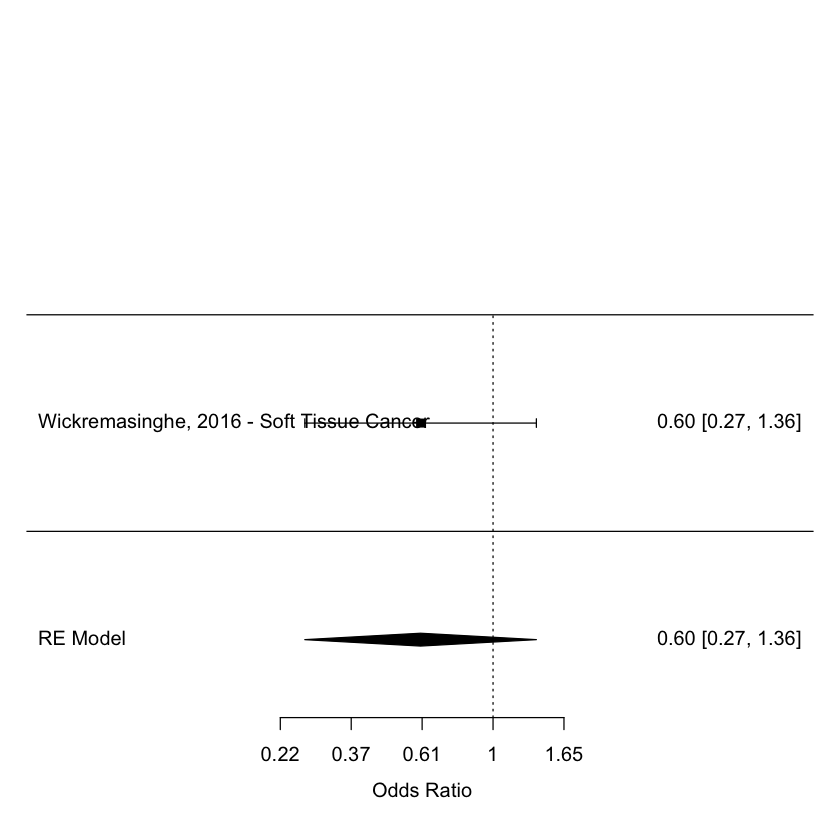

----------------------------------------------------------------
Cancer Type: Any Leukemia 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.1 with 95% confidence interval ( 0.05621251 ,  0.1778964 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  0.3056    0.0000    3.3888   -0.6112   15.3888   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb    ci.ub      
 -2.3026  0.2939  -7.8348  <.0001  -2.8786  -1.7266  *** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



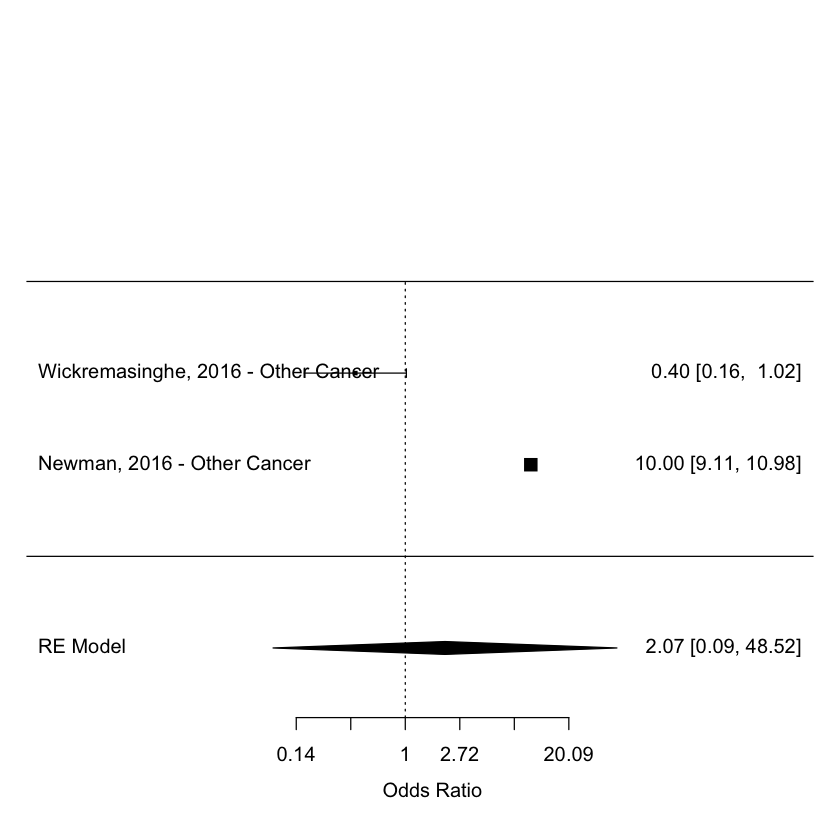

----------------------------------------------------------------
Cancer Type: Lymphocytic Leukemia 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.1 with 95% confidence interval ( 0.05621251 ,  0.1778964 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  0.3056    0.0000    3.3888   -0.6112   15.3888   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb    ci.ub      
 -2.3026  0.2939  -7.8348  <.0001  -2.8786  -1.7266  *** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



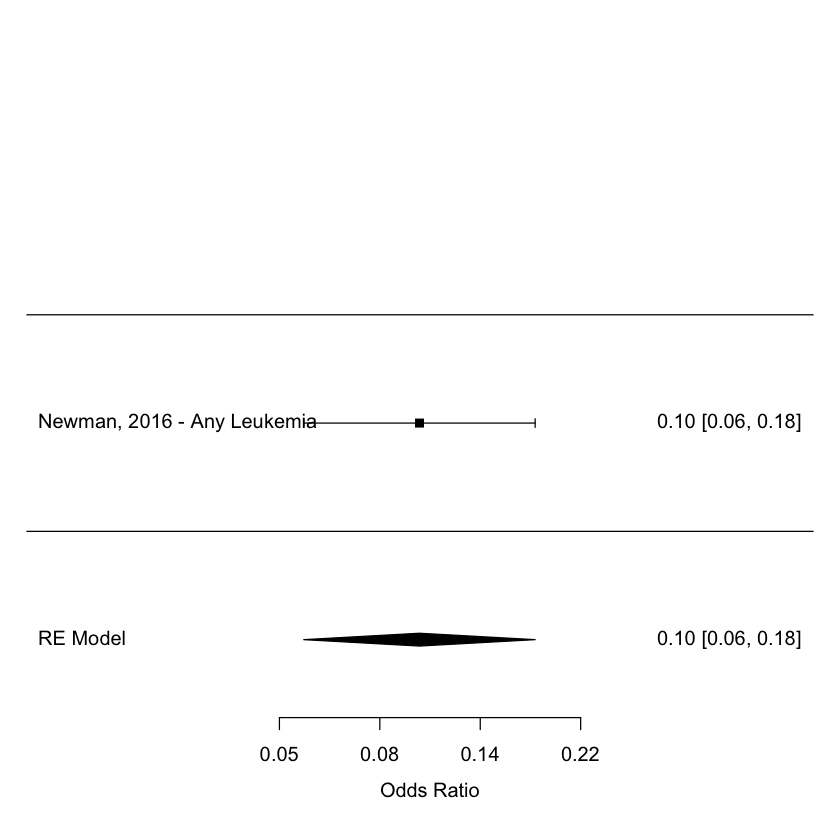

----------------------------------------------------------------
Cancer Type: Nonlymphocytic Leukemia 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.1 with 95% confidence interval ( 0.01727475 ,  0.5788796 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.8090    0.0000    5.6180    1.6180   17.6180   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb    ci.ub    
 -2.3026  0.8959  -2.5702  0.0102  -4.0585  -0.5467  * 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



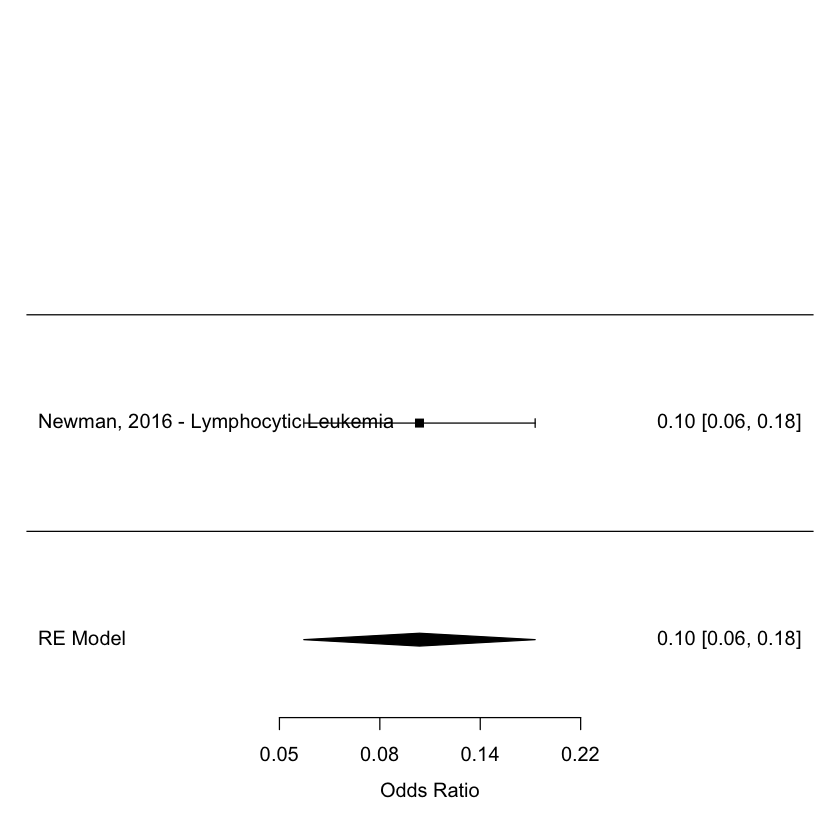

----------------------------------------------------------------
Cancer Type: Myelocytic Leukemia 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.1 with 95% confidence interval ( 0.01425422 ,  0.7015464 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -0.9129    0.0000    5.8257    1.8257   17.8257   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb    ci.ub    
 -2.3026  0.9939  -2.3166  0.0205  -4.2507  -0.3545  * 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



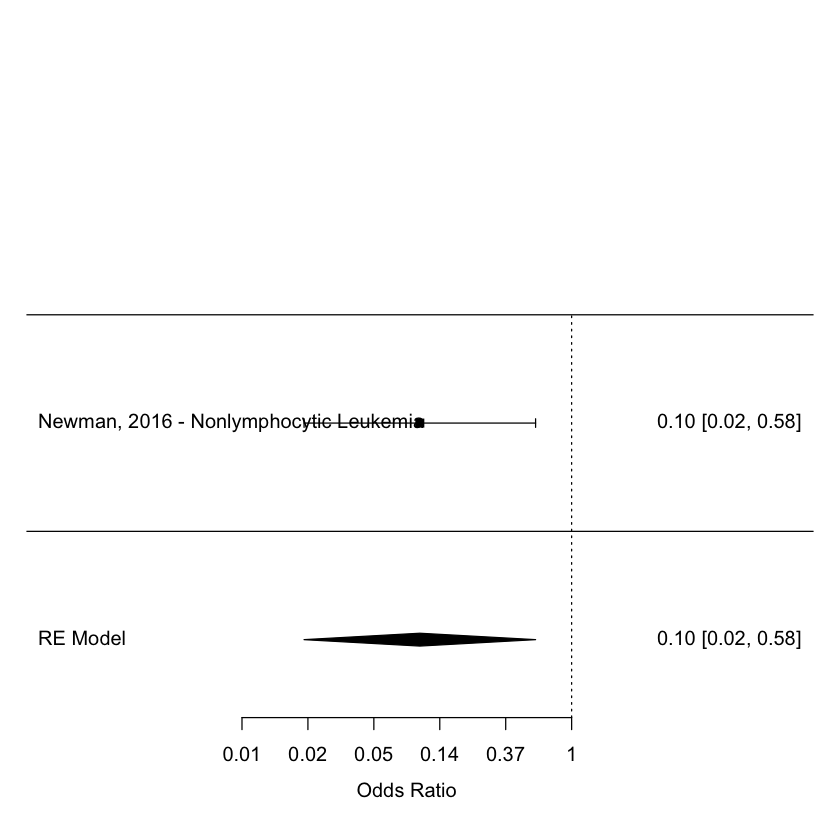

----------------------------------------------------------------
Cancer Type: Other Nonlymphocytic Leukemia 
----------------------------------------------------------------
Number of rows: 1 
The overall effect size (odds ratio) is 0.1 with 95% confidence interval ( 0.008158721 ,  1.225682 )

Random-Effects Model (k = 1; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
 -1.1647    0.0000    6.3294    2.3294   18.3294   

tau^2 (estimated amount of total heterogeneity): 0
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 0) = 0.0000, p-val = 1.0000

Model Results:

estimate      se     zval    pval    ci.lb   ci.ub    
 -2.3026  1.2786  -1.8008  0.0717  -4.8086  0.2035  . 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



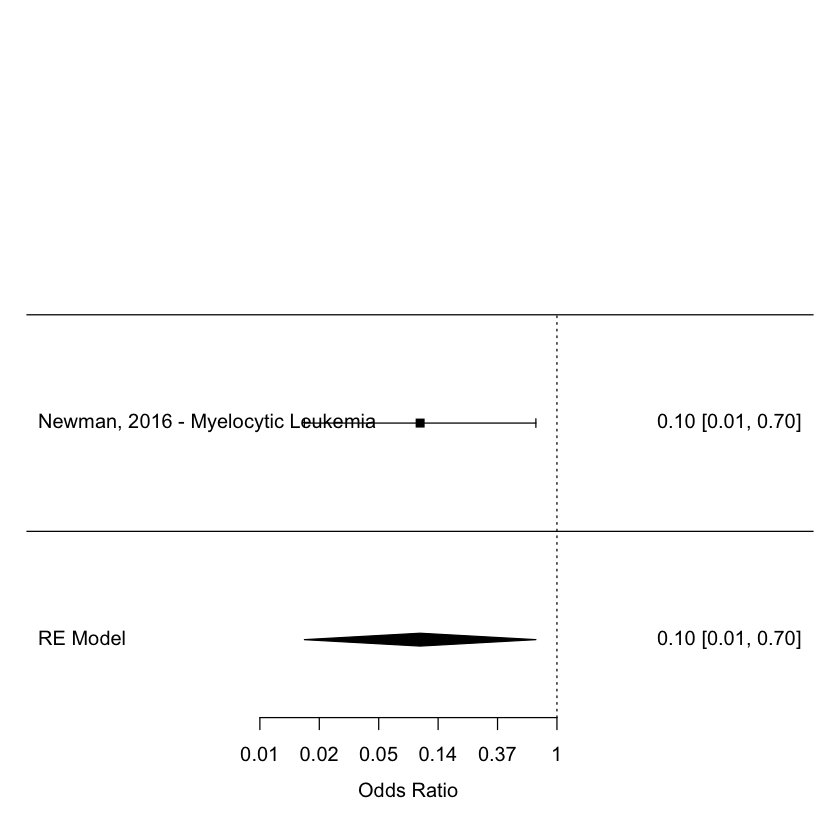

----------------------------------------------------------------


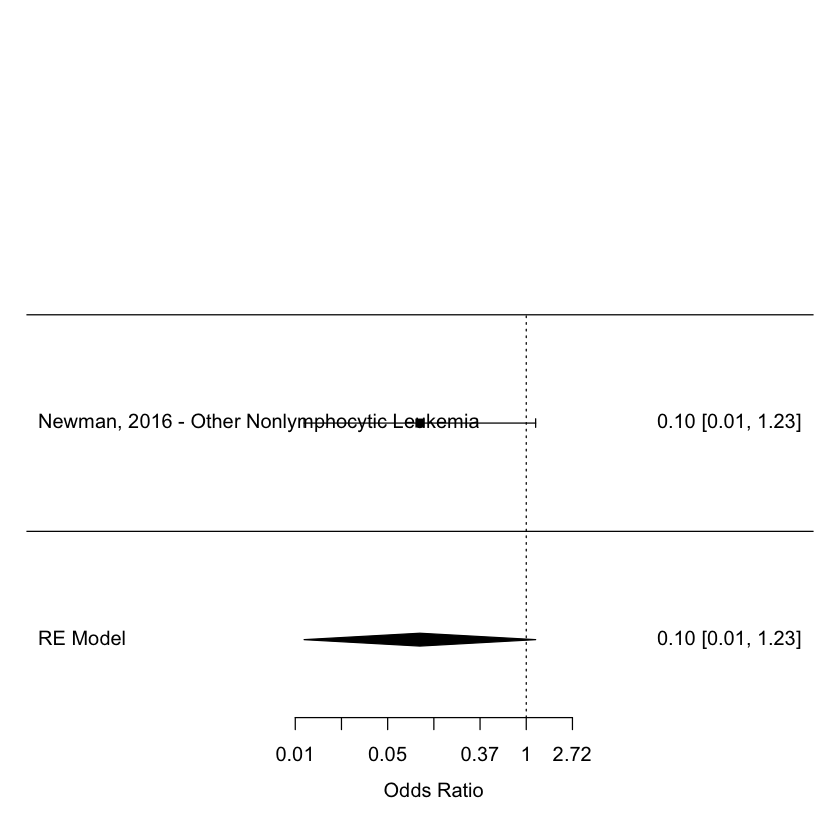

In [28]:
# subset the data by cancer type and draw the forest plot
for (cancer_name in unique(data$cancer_type)) {
    cat("Cancer Type:", cancer_name, "\n")
    cat("----------------------------------------------------------------\n")
    focus_data <- data[data$cancer_type == cancer_name,]
    #print number of rows in the data
    cat("Number of rows:", nrow(focus_data), "\n")
    draw_forest_and_other_plots(focus_data)
    # print a dotted line to separate the plots
    cat("----------------------------------------------------------------\n")
}
